In [4]:
import pandas as pd

def audit_report(df):
    print("**************************AUDIT REPORT***********************")
    print ("-----------------Number of Columns--------------------------")
    print(len(df.columns))
    print ("-----------------Number of Records--------------------------")
    print(len(df.index))
    print ("-----------------Columns Data Types-------------------------")
    print(df.dtypes)
    print ("-----------------Number of Missing cells--------------------")
    print(df.isnull().sum())
    print ("-----------------Number of duplicate rows--------------------")    
    print(df.duplicated().sum())
    print ("-----------------Memory Taken By Dataframe-------------------") 
    print((df.memory_usage(deep=True).sum())/1048576, "MB" )
    print ("-----------------------Warning-------------------------------")
    print("Max missing values are in column:",df.count().idxmin())
    print ("-------------------Range of columns--------------------------")
    print(df.describe().loc[['max','min']])
    print("--------------------Unique Classes in columns-----------------")
    for i in df:
        if(df[i].dtypes=="object"):
            print( df[i].unique())
        
    return;



In [31]:
def main_function():
    user_file_name = "C:/Users/Zohran/Documents/R/sec_b.xlsx"#input("Enter full file path")
    df = pd.read_excel(user_file_name)
    #audit_report(df)
    merge_columns(df, "sbq09", "sbq10")
    #sort_column(df,"sbq09")
    #filter_column(df)
    return;

Press 1 for addition
Press 2 for subtraction
Press 3 for division
Press 4 for multiplication
Press 5 for maximum
Press 6 for minimum
Enter your choice: 1
       hhcode       psu province region district  sec  idc  \
0  1111000101  11110001       kp  rural  chitral  00B    1   
1  1111000101  11110001       kp  rural  chitral  00B    2   
2  1111000101  11110001       kp  rural  chitral  00B    3   
3  1111000101  11110001       kp  rural  chitral  00B    4   
4  1111000101  11110001       kp  rural  chitral  00B    5   

                 sbq02         sbq03   sbq04  ... sbq61  sbq62  sbq63  age  \
0                 head           NaN    male  ...  1933      0      0   81   
1               spouse  family elder  female  ...  1944      0      0   70   
2         son/daughter  family elder    male  ...  1970      0      0   44   
3  son/daughter-in-law  family elder  female  ...  1977      0      0   37   
4          grand child  family elder    male  ...  2002      0      0   12   

    

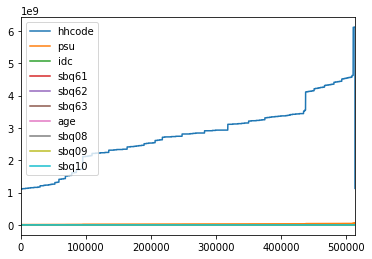

In [32]:
main_function()

In [30]:
def my_add(c1,c2):
    return (c1+c2)

def my_subtract(c1,c2):
    return (c1-c2)

def my_multiply(c1,c2):
    return (c1*c2)

def my_divide(c1,c2):
    return c1/c2


def merge_columns(df, col_name1, col_name2):
    if(df[col_name1].dtype != "object" and df[col_name2].dtype != "object" ):
        print("Press 1 for addition")
        print("Press 2 for subtraction")
        print("Press 3 for division")
        print("Press 4 for multiplication")
        print("Press 5 for maximum")
        print("Press 6 for minimum")
        option = input("Enter your choice: ")
        
        if(option=='1'):
            new_col=my_add(col_name1, col_name2)
            df['add_operation']=new_col
            print(df.head())
        elif(option=='2'):
            new_col=my_subtract(col_name1, col_name2)
            df['subtract_operation']=new_col
            print(df.head())
        elif(option=='3'):
            new_col=my_multiply(col_name1, col_name2)
            df['multiply_operation']=new_col
            print(df.head())
        elif(option=='4'):
            new_col=my_divide(col_name1, col_name2)
            df['divide_operation']=new_col
            print(df.head())
        elif(option=='5'):
            new_col=df[[col_name1, col_name2]].values.max(1)
            df['max_operation']=new_col
            print(df.head())
        elif(option=='6'):
            new_col=df[[col_name1, col_name2]].values.min(1)
            df['min_operation']=new_col
            print(df.head())
        else:
            print("Wrong Input")
    elif(df[col_name1].dtype == "object" and df[col_name2].dtype == "object" ):
        df["concatenated"]= df[col_name1]+' '+df[col_name2]
        print(df.head())
    else:
        print("Error: Type should be numeric")
    dis_graph(df)

In [12]:
def sort_column(df,col1):
    df.sort_values(col1,inplace=True)
    print(df)
    return;

In [11]:
def filter_column(df):
    List=[]
    col_num= input("how many columns you want to display:  ")

    for i in range(int(col_num)):
        col_name= input("Enter column name to display:  ")
        if(col_name in df.columns):
            List.append(col_name)
        else:
            print("Wrong column name")
     
    for j in List:   
        print(df[j].head())

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

def dis_graph(df):
    df.plot()
    plt.show()